<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.3: Stacking

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667 <font color='green'>&rarr; current Stacking model: 0.950<font>
    - **ROC AUC**  = 0.9614 <font color='green'>&rarr; current Stacking model: 0.947<font>
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

- <font color='green'>Will a person be diagnosed with a **Benign** or **Malignant** cancer<font>

## Actual Question
Choose the **one** question that should be answered.

- <font color='green'>Will a person be diagnosed with a **Benign** or **Malignant** cancer<font>

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [59]:
# Find the dataset described above 
# Hint: search for it through the UCI Machine Learning Repository

Dataset download:
* [Breast Cancer Wisconsin (Original) Data Set](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29)

In [60]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from colorama import Fore, Style

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

%matplotlib inline

In [61]:
plt.style.use('ggplot')

In [62]:
# Check library version 
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)
print('Seaborn: ', sns.__version__)

Numpy:  1.23.3
Pandas:  1.4.4
Seaborn:  0.12.1


# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [63]:
# Define column names
column_names = ['sample_number',
                'clump_thickness',
                'uniformity_of_cell_size',
                'uniformity_of_cell_shape',
                'marginal_adhesion',
                'single_epithelial_cell_size',
                'bare_nuclei',
                'bland_chromatin',
                'normal_nucleoli',
                'mitoses',
                'class']

In [64]:
# Read data in pandas
df = pd.read_csv('../../DATA/breast-cancer-wisconsin-data-old.csv', header=None, names=column_names)

In [65]:
# Check data has loaded correctly
df.head()

,sample_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [66]:
# Check data dimension
df.shape

(699, 11)

In [67]:
# Summarize data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sample_number                699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_of_cell_size      699 non-null    int64 
 3   uniformity_of_cell_shape     699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [68]:
# Generate descriptive statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sample_number,699.0,NaN,NaN,NaN,1071704.098712,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
clump_thickness,699.0,NaN,NaN,NaN,4.41774,2.815741,1.0,2.0,4.0,6.0,10.0
uniformity_of_cell_size,699.0,NaN,NaN,NaN,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
uniformity_of_cell_shape,699.0,NaN,NaN,NaN,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,NaN,NaN,NaN,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
single_epithelial_cell_size,699.0,NaN,NaN,NaN,3.216023,2.2143,1.0,2.0,2.0,4.0,10.0
bare_nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bland_chromatin,699.0,NaN,NaN,NaN,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,NaN,NaN,NaN,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,NaN,NaN,NaN,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0


In [69]:
# Count unique rows for bare_nuclei
df.bare_nuclei.value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

**16x '?'**

In [70]:
# Replace '?' with NaN
df['bare_nuclei'].replace('?', np.NaN, inplace=True)

In [71]:
# Count unique rows for bare_nuclei including NA values
df.bare_nuclei.value_counts(dropna = False)

1      402
10     132
2       30
5       30
3       28
8       21
4       19
NaN     16
9        9
7        8
6        4
Name: bare_nuclei, dtype: int64

In [72]:
# Return unique values
df.bare_nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', nan, '5', '8', '6'],
      dtype=object)

In [73]:
# Convert class labels (2 for benign: convert to 0; 4 for malignant: convert to 1)
df['class'].replace(2, 0, inplace=True)
df['class'].replace(4, 1, inplace=True)

In [74]:
# Missing values
df.isna().sum()

sample_number                   0
clump_thickness                 0
uniformity_of_cell_size         0
uniformity_of_cell_shape        0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

In [75]:
## Missing value imputation using SimpleImputer from sklearn

# Get values
values = df.values

# Instantiate imputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

# Fit and apply imputer
imputedData = imputer.fit_transform(values)
imputedData.shape

(699, 11)

In [76]:
df = pd.DataFrame(imputedData, columns=df.columns)
df.head()

,sample_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sample_number                699 non-null    float64
 1   clump_thickness              699 non-null    float64
 2   uniformity_of_cell_size      699 non-null    float64
 3   uniformity_of_cell_shape     699 non-null    float64
 4   marginal_adhesion            699 non-null    float64
 5   single_epithelial_cell_size  699 non-null    float64
 6   bare_nuclei                  699 non-null    float64
 7   bland_chromatin              699 non-null    float64
 8   normal_nucleoli              699 non-null    float64
 9   mitoses                      699 non-null    float64
 10  class                        699 non-null    float64
dtypes: float64(11)
memory usage: 60.2 KB


In [78]:
# Convert target variable to int
df['class'] = df['class'].astype('int')
df.dtypes

sample_number                  float64
clump_thickness                float64
uniformity_of_cell_size        float64
uniformity_of_cell_shape       float64
marginal_adhesion              float64
single_epithelial_cell_size    float64
bare_nuclei                    float64
bland_chromatin                float64
normal_nucleoli                float64
mitoses                        float64
class                            int32
dtype: object

In [79]:
df.head()

,sample_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0


In [80]:
# Check if target variable is balanced
df['class'].value_counts(normalize=True)

0    0.655222
1    0.344778
Name: class, dtype: float64

In [81]:
# Drop feature 'sample_number'
df.drop('sample_number', axis=1, inplace=True)

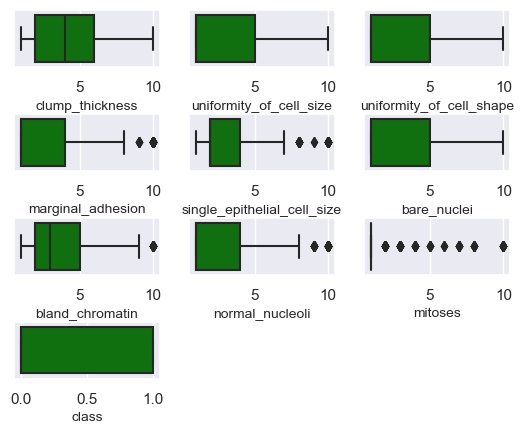

In [82]:
## Outliers: Boxplots

# Plot boxplot for each feature w/ separate y-axis to visualize outliers

for i, col in enumerate(df.columns):
    sns.set()
    plt.subplot(4, 3, i+1) # nrows, ncols, index
    sns.boxplot(x=col, data=df, color='green')
    plt.xlabel(f'{col}', fontsize=10)
    plt.subplots_adjust(hspace=0.8)

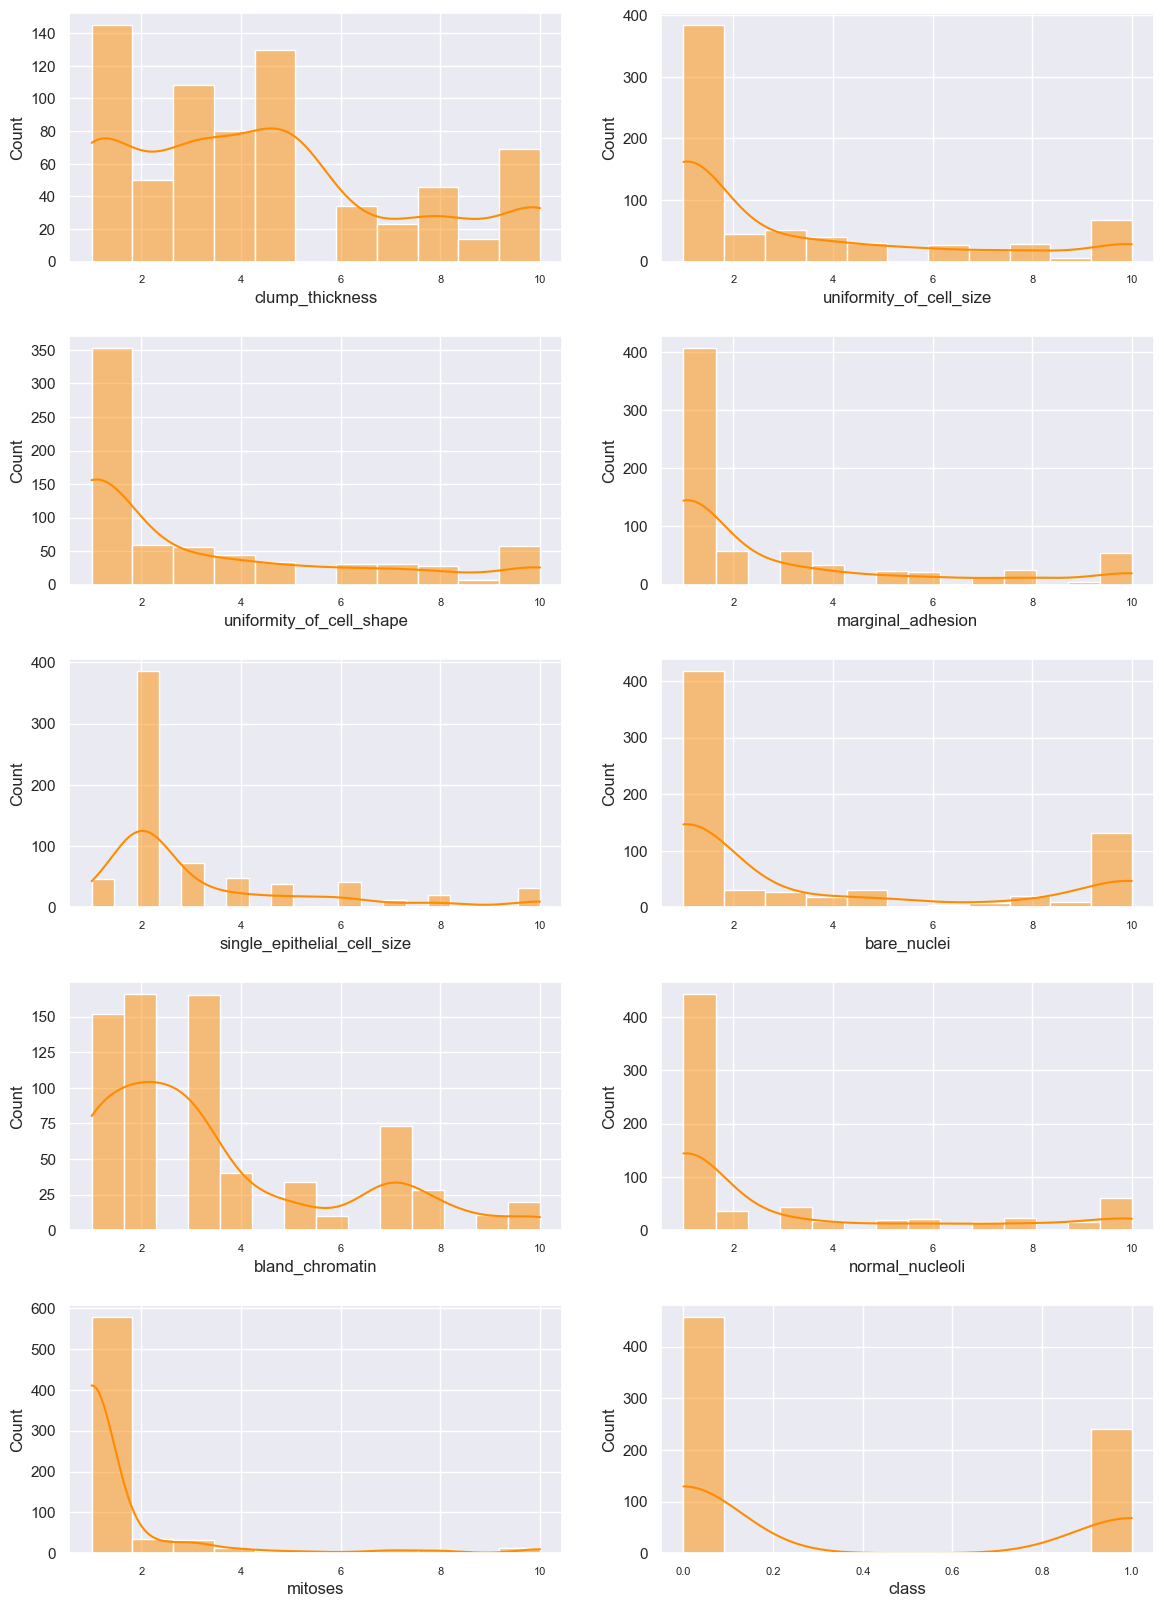

In [83]:
## Histograms: Plot feature distributions

# Features to plot
columns = df.columns

# Creating subplot axes
fig, axes = plt.subplots(5, 2, figsize=(14,20), sharey=False)
# axes[5,1].set_axis_off()

# Iterating through axes and columns
for col, ax in zip(columns, axes.flatten()):
    sns.histplot(x=col, kde=True, data=df, color='darkorange', ax=ax)
    ax.tick_params(axis='x', labelsize=8)
    plt.subplots_adjust(hspace=0.3);

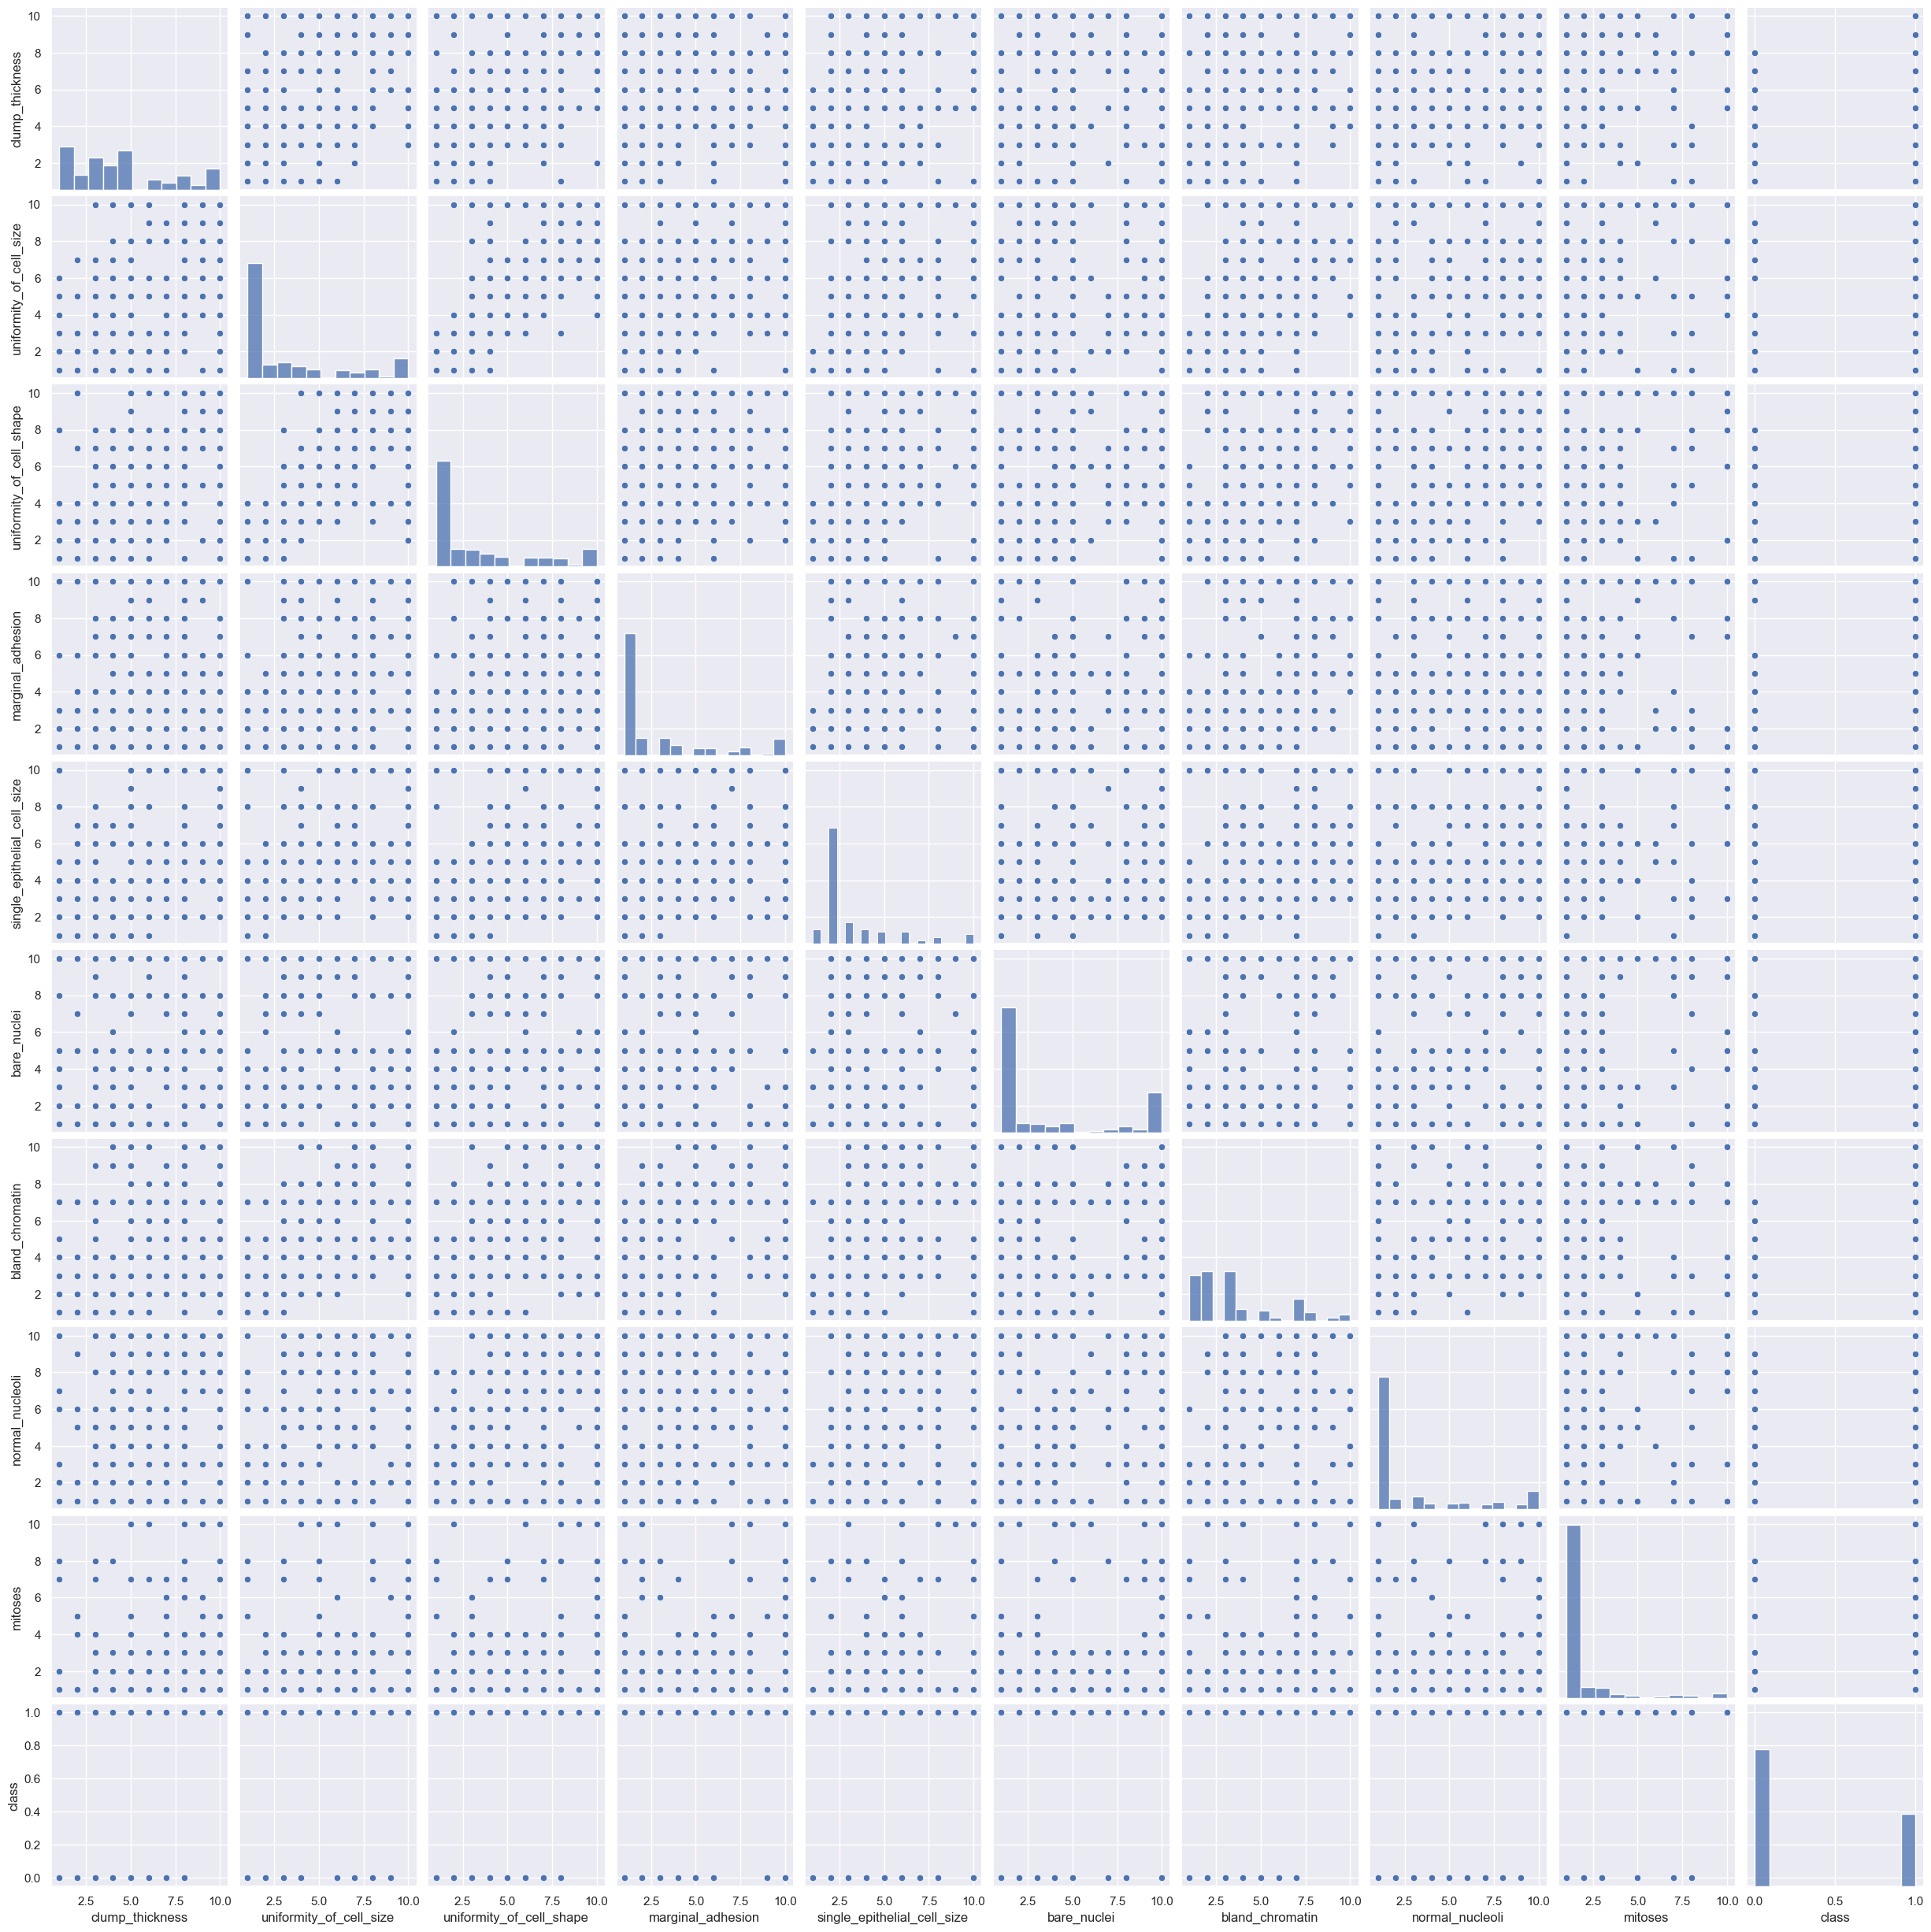

In [84]:
# Pairwise relationship
sns.pairplot(df);

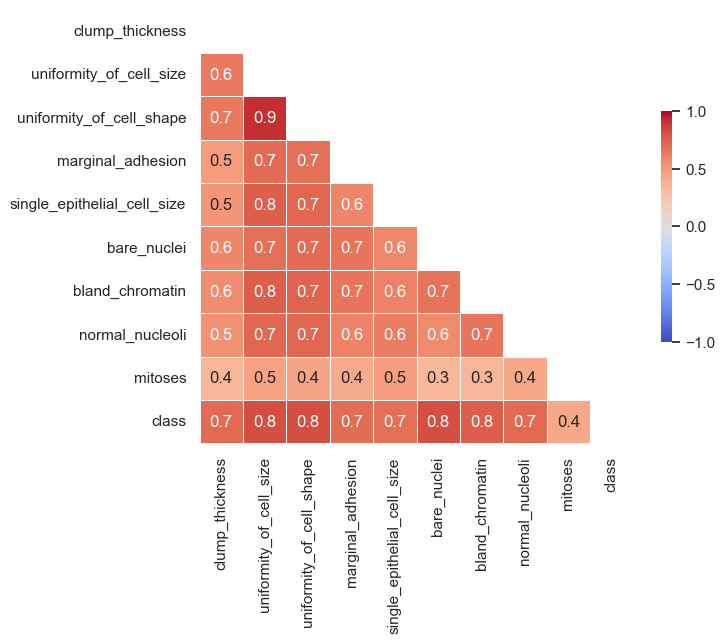

In [85]:
# Correlation heatmap
sns.set_theme(style="white")
plt.subplots(figsize=(7,6))

# Generate mask for upper triangle
mask = np.zeros_like(df.corr(), dtype=bool) #generate mask of "0's"
mask[np.triu_indices_from(mask)] = True #return upper triangle
# Set diverging colormap
cmap = sns.color_palette('coolwarm', as_cmap=True)
# Draw heatmap with mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, fmt='.1g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

**Documentation**
* '?' were replaced with NaN 
* Missing values were imputed using SimpleImputer from sklearn
* Class labels were converted to 0 and 1 (benign and malignant)
* Target variable has a ratio of ~2:1 (benign:malignant), i.e. is slightly imbalanced
* Feature 'sample_number' was dropped
* Some features show outliers
* Feature data is highly skewed
* All features are moderately to highly correlated to each other and therefore some of the features could be dropped to simplify the input

In [86]:
plt.style.use('ggplot')

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [87]:
## Filter/subset/clean the data according to your EDA findings

**No action required here**

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [X] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [X] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

Function `copy()` can be helpful in situations where you want to duplicate a list so you can change it, without changing the original list.

In [88]:
# Define features and target
target = 'class'

X = df.drop(target, axis=1).copy()
y = df[target].copy()

# Alternatively ...
# features = columns[1:-1] # discard the first and last column

In [89]:
X.shape, y.shape

((699, 9), (699,))

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [90]:
# Split your data
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=test_size, stratify=y)

In [91]:
X_test[:5]

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
549,7.0,8.0,3.0,7.0,4.0,5.0,7.0,8.0,2.0
154,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
297,5.0,4.0,3.0,1.0,2.0,1.0,2.0,3.0,1.0
96,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0
493,5.0,10.0,10.0,10.0,6.0,10.0,6.0,5.0,2.0


In [92]:
y_test[:5]

549    1
154    0
297    0
96     0
493    1
Name: class, dtype: int32

In [93]:
y_train.value_counts(normalize=True)

0    0.654741
1    0.345259
Name: class, dtype: float64

In [94]:
y_test.value_counts(normalize=True)

0    0.657143
1    0.342857
Name: class, dtype: float64

**Note!** Scaling is not necessarily required as Decision Tree models work well with skewed data

In [95]:
## Scale data using MinMaxScaler from sklearn

# Instantiate scaler
scaler =  MinMaxScaler(feature_range = (0,1))

# Fit and apply scaler
Xs_train = scaler.fit_transform(X_train) # fit scaler on training only!
Xs_test = scaler.transform(X_test) # apply train-fitted scaler on test

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

**Sub Models**

In [96]:
np.sqrt(len(X))

26.43860813280457

In [97]:
## Instantiate and fit sub models

# kNN
clf1 = KNeighborsClassifier(n_neighbors=27)
clf1.fit(Xs_train, y_train)

# RF
clf2 = RandomForestClassifier(n_estimators=10, max_depth=3, class_weight='balanced_subsample', random_state=42)
clf2.fit(Xs_train, y_train)

# NB
clf3 = GaussianNB()
clf3.fit(Xs_train, y_train)

# LR
lr = LogisticRegression(multi_class = 'auto', solver = 'lbfgs')
lr.fit(Xs_train, y_train)

print()

**Ensemble Model**

In [98]:
# Create the ensemble model
sclf = StackingClassifier(classifiers = [clf1, clf2, clf3], meta_classifier = lr)
sclf.fit(Xs_train, y_train)

StackingClassifier(classifiers=[KNeighborsClassifier(n_neighbors=27),
                                RandomForestClassifier(class_weight='balanced_subsample',
                                                       max_depth=3,
                                                       n_estimators=10,
                                                       random_state=42),
                                GaussianNB()],
                   meta_classifier=LogisticRegression())

**Cross-Validation**

In [99]:
# Accuracy score via cross-validation
results = cross_val_score(sclf, Xs_train, y_train, cv=10)

# Equal to ...
# kfold = KFold(n_splits = 10)
# results = cross_val_score(sclf, X_train, y_train, cv=kfold)

print(f'Stacking, cross-validation mean accuracy score on training set: {results.mean():.2f}')

Stacking, cross-validation mean accuracy score on training set: 0.97


# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

## Define functions

In [100]:
def show_summary_report(model, X_test, y_test):
    """
    Function to generate predictions and probabilities on input data, 
    output model performance indicators and 
    plot confusion matrix, precision-recall and ROC curve
    """
    # Make prediction on input data
    y_pred = model.predict(X_test)
    
    # Generate prediction probabilities for input data
    y_test_prob = model.predict_proba(X_test)[:,1]
                       
    # Model performance    
    accuracy_ = accuracy_score(y_test, y_pred)
    precision_ = precision_score(y_test, y_pred)
    recall_ = recall_score(y_test, y_pred)
    f1_ = f1_score(y_test, y_pred)
    roc_auc_ = roc_auc_score(y_test, y_pred)

    print(f'\033[1mSummary Report\033[0m')
    print(f'\033[1mAccuracy:  {accuracy_:.2f}\033[0m [TP / N] Proportion of predicted labels that match true labels')
    print(f'\033[1mPrecision: {precision_:.2f}\033[0m [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative')
    print(f'\033[1mRecall:    {recall_:.2f}\033[0m [TP / (TP + FN)] Ability of the classifier to find all positive samples')
    print(f'\033[1mF1-score:  {f1_:.2f}\033[0m [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall')
    print(f'\033[1mROC AUC:   {roc_auc_:.2f}\033[0m')
    print(113*'-')
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')
    print(113*'-', '\n')
    
    # Confusion Matrix
    mat = confusion_matrix(y_test, y_pred)
    
    # Precision/Recall
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)

    # Plot
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

    # Confusion Matrix
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in mat.flatten()]
    labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(mat, annot=labels, cmap=plt.cm.Blues, fmt="", ax=ax[0])
    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color='b', alpha=0.2, where='post')
    ax[1].fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate (1-specificity)')
    ax[2].set_ylabel('True Positive Rate (sensitivity)')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc='lower right')
    
    plt.show()
    
    return accuracy_, precision_, recall_, f1_, roc_auc_

## Evaluation of all models on training data


K-NN_train

Summary Report
Accuracy:  0.97 [TP / N] Proportion of predicted labels that match true labels
Precision: 0.96 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative
Recall:    0.95 [TP / (TP + FN)] Ability of the classifier to find all positive samples
F1-score:  0.96 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall
ROC AUC:   0.96
-----------------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
----------------------------------------------------------------------------------------------------------------- 



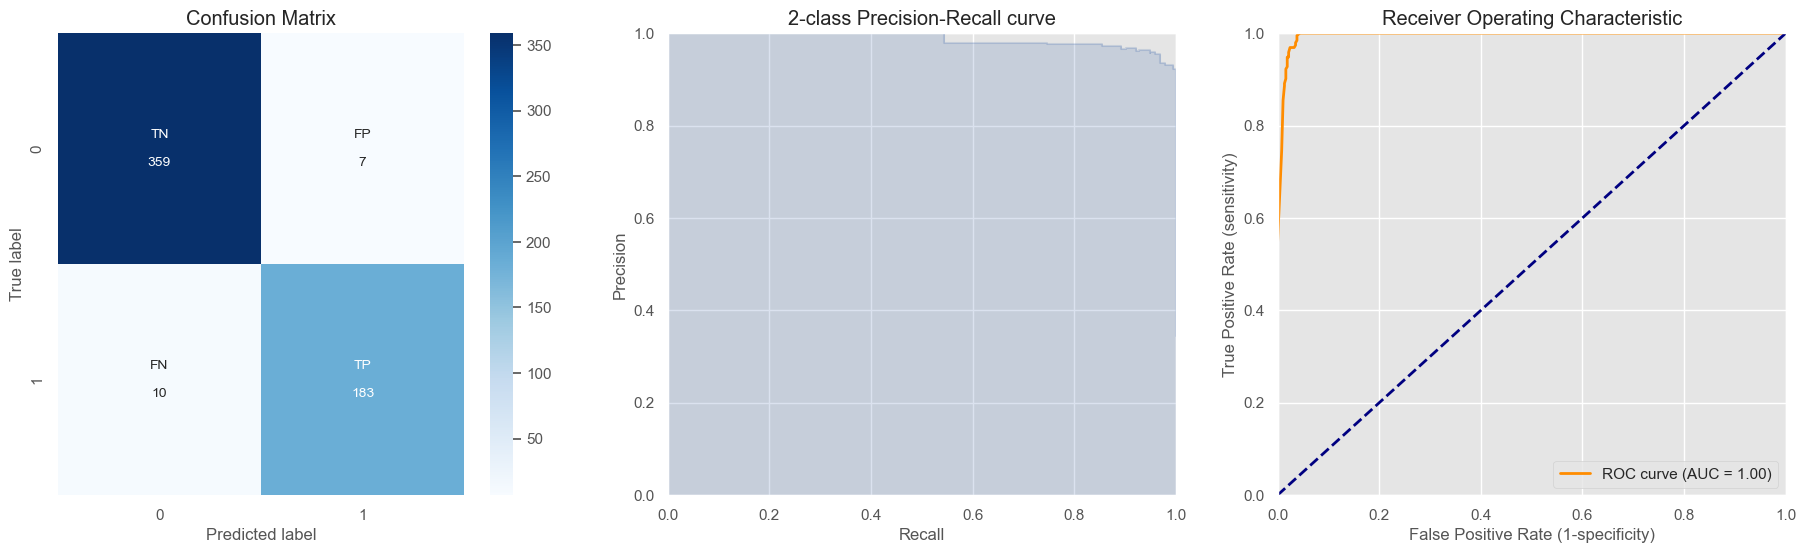


Random Forest_train

Summary Report
Accuracy:  0.97 [TP / N] Proportion of predicted labels that match true labels
Precision: 0.92 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative
Recall:    0.99 [TP / (TP + FN)] Ability of the classifier to find all positive samples
F1-score:  0.96 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall
ROC AUC:   0.97
-----------------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
----------------------------------------------------------------------------------------------------------------- 



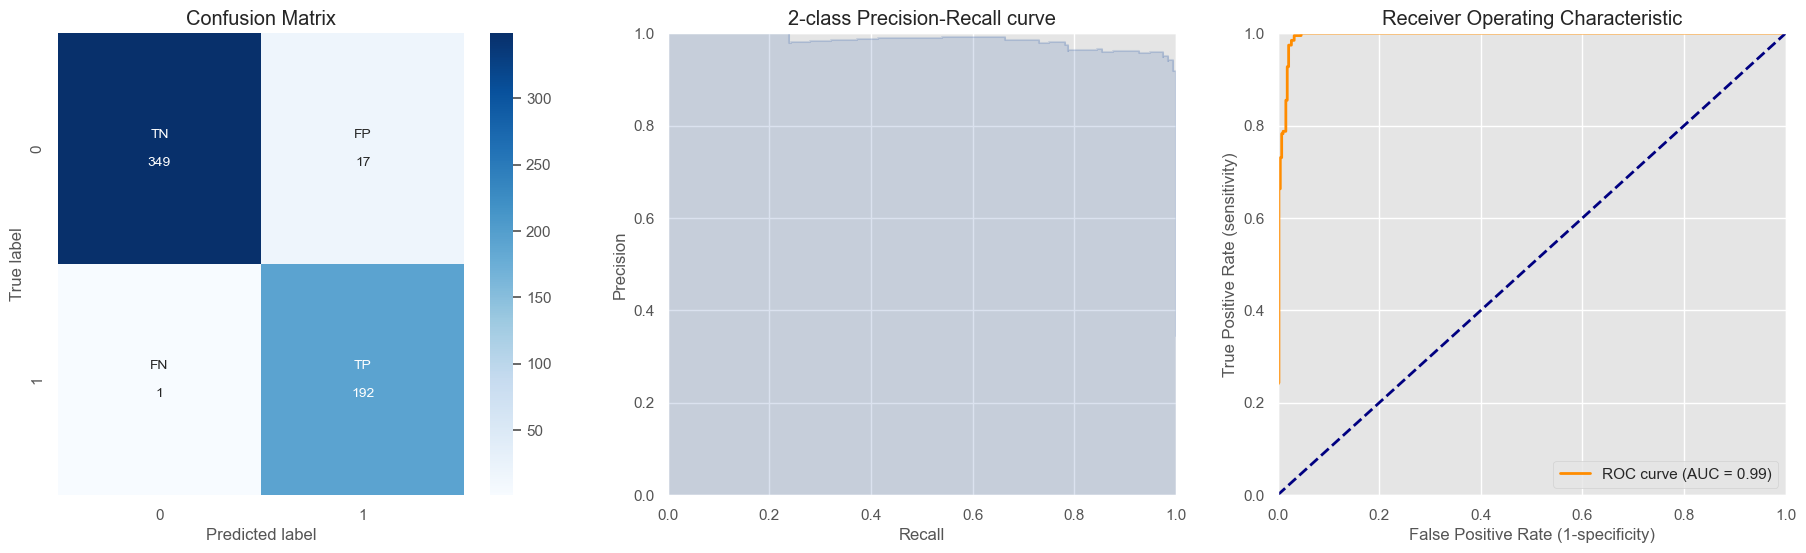


Naïve Bayes_train

Summary Report
Accuracy:  0.96 [TP / N] Proportion of predicted labels that match true labels
Precision: 0.91 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative
Recall:    0.98 [TP / (TP + FN)] Ability of the classifier to find all positive samples
F1-score:  0.95 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall
ROC AUC:   0.97
-----------------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
----------------------------------------------------------------------------------------------------------------- 



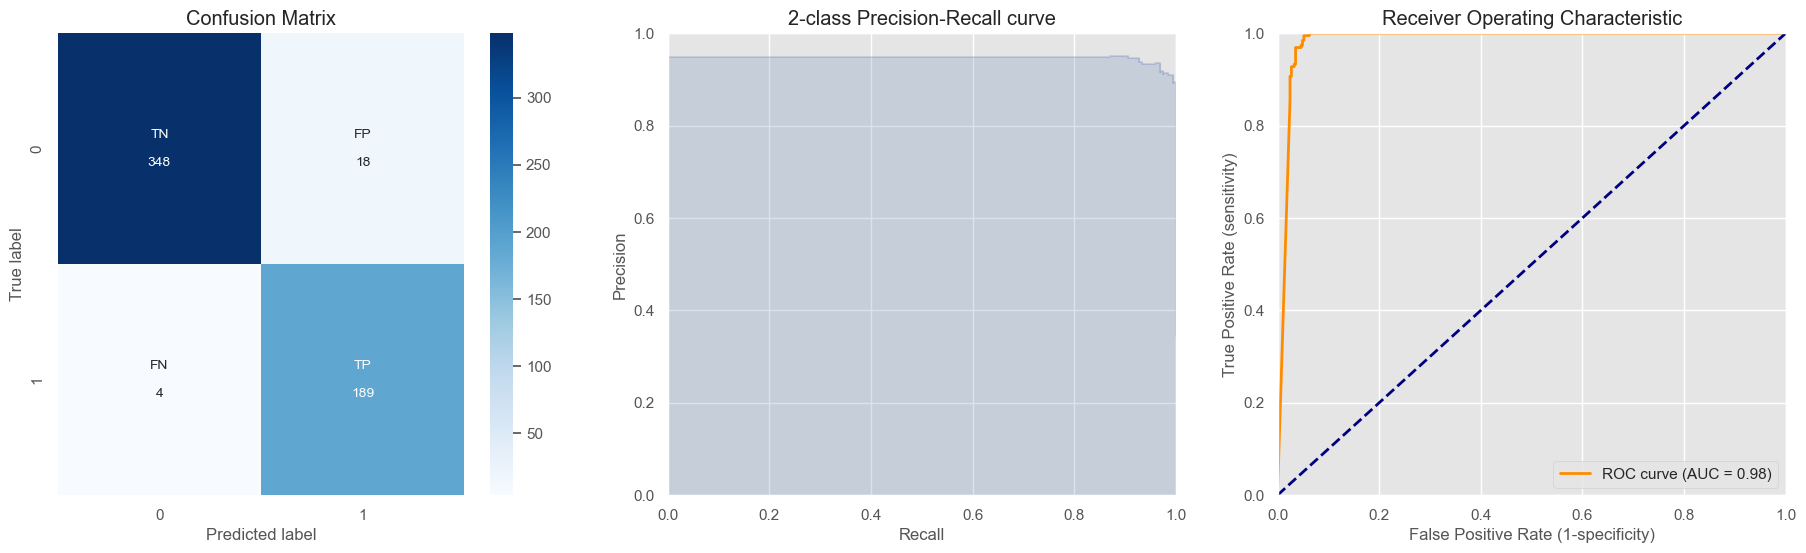


Logistic Regression_train

Summary Report
Accuracy:  0.97 [TP / N] Proportion of predicted labels that match true labels
Precision: 0.96 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative
Recall:    0.94 [TP / (TP + FN)] Ability of the classifier to find all positive samples
F1-score:  0.95 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall
ROC AUC:   0.96
-----------------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
----------------------------------------------------------------------------------------------------------------- 



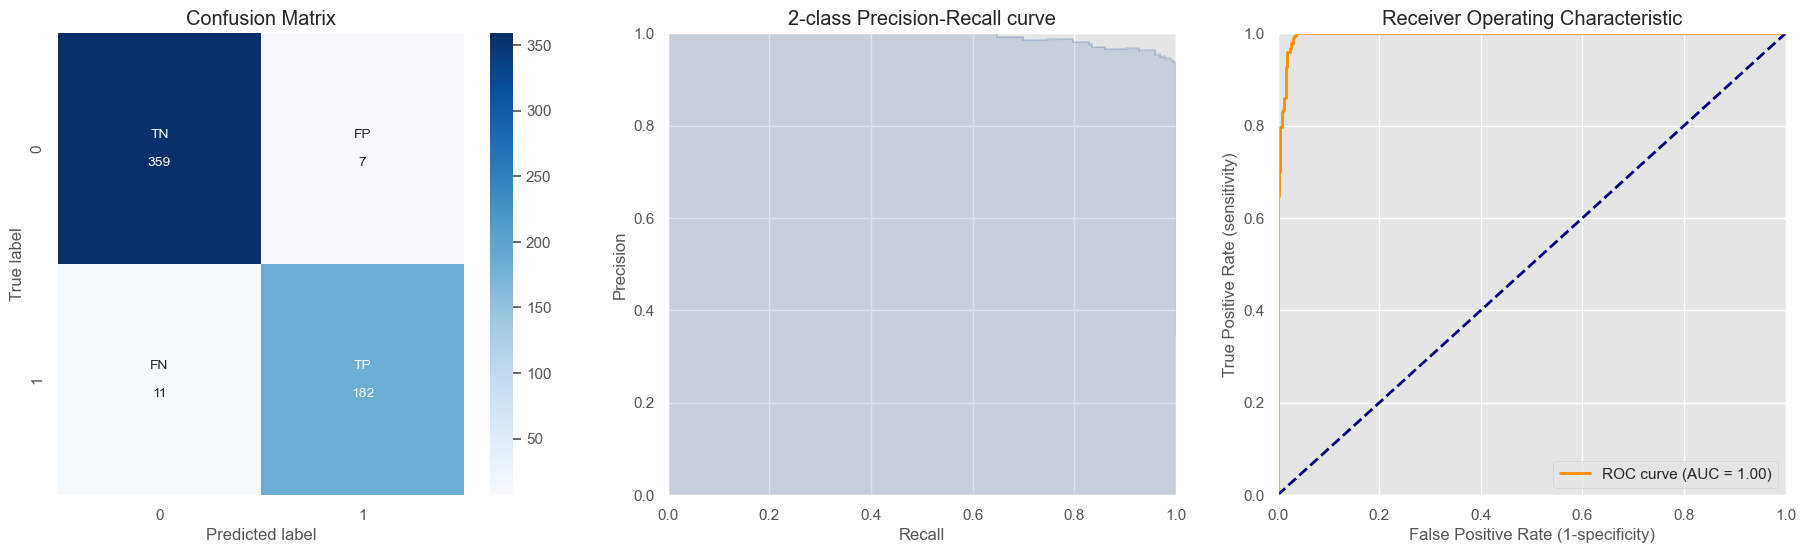


Stacking_train

Summary Report
Accuracy:  0.97 [TP / N] Proportion of predicted labels that match true labels
Precision: 0.95 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative
Recall:    0.97 [TP / (TP + FN)] Ability of the classifier to find all positive samples
F1-score:  0.96 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall
ROC AUC:   0.97
-----------------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
----------------------------------------------------------------------------------------------------------------- 



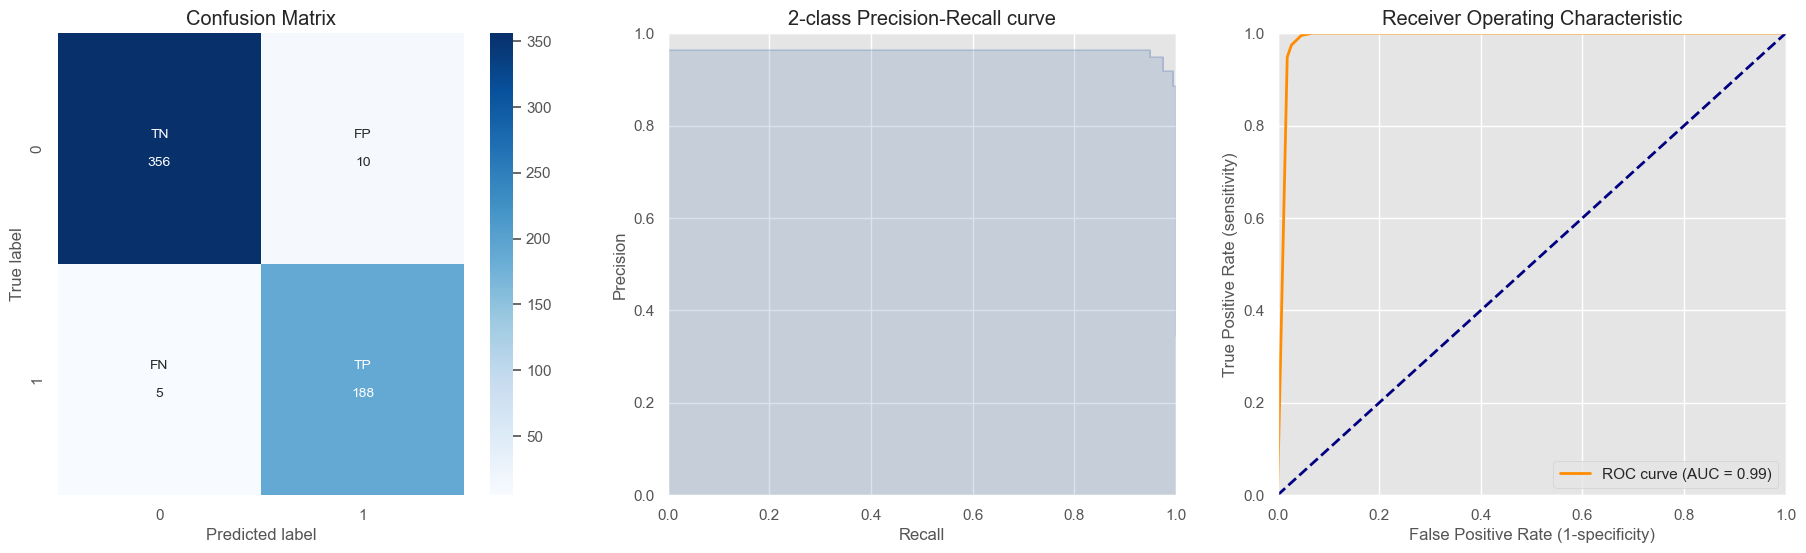

,Model,Accuracy,Precision,Recall,F1-score,ROC_AUC
0,K-NN_train,0.970,0.963,0.948,0.956,0.965
1,Random Forest_train,0.968,0.919,0.995,0.955,0.974
2,Naïve Bayes_train,0.961,0.913,0.979,0.945,0.965
3,Logistic Regression_train,0.968,0.963,0.943,0.953,0.962
4,Stacking_train,0.973,0.949,0.974,0.962,0.973


In [101]:
## Print summary report including all plots and combine performance indicators of all models in a dataframe

# Create empty df with column headers
column_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC_AUC']
results_train = pd.DataFrame(columns=column_names)

# Model names
models = ['K-NN_train', 'Random Forest_train', 'Naïve Bayes_train', 'Logistic Regression_train', 'Stacking_train']

# Iterate through models
for i, m in enumerate([clf1, clf2, clf3, lr, sclf]):
    print(f'\n\033[1m{Fore.BLUE}{models[i]}{Style.RESET_ALL}\033[0m\n')
    
    # Summary report
    accuracy_, precision_, recall_, f1_, roc_auc_ = show_summary_report(m, Xs_train, y_train)
    
    # Round values
    list = [accuracy_, precision_, recall_, f1_, roc_auc_]
    accuracy_, precision_, recall_, f1_, roc_auc_ = [round(x, 3) for x in list]
    
    # Add results to df
    results_train.loc[i] = {'Model': models[i], 'Accuracy': accuracy_, 'Precision': precision_,
                            'Recall': recall_, 'F1-score': f1_, 'ROC_AUC': roc_auc_}    

# Print dataframe with performance indicators for all models
print('\n')
results_train

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

## Evaluation of all models on testing data


K-NN_test

Summary Report
Accuracy:  0.94 [TP / N] Proportion of predicted labels that match true labels
Precision: 0.93 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative
Recall:    0.88 [TP / (TP + FN)] Ability of the classifier to find all positive samples
F1-score:  0.90 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall
ROC AUC:   0.92
-----------------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
----------------------------------------------------------------------------------------------------------------- 



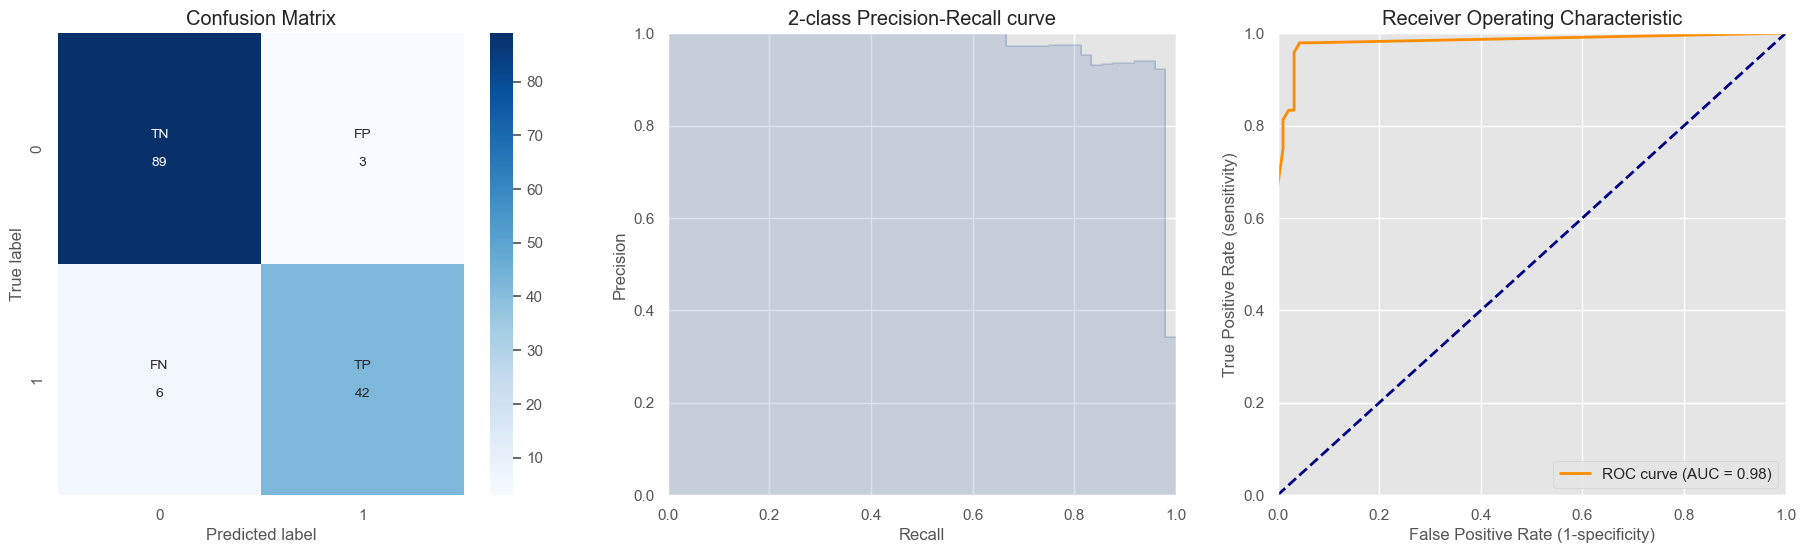


Random Forest_test

Summary Report
Accuracy:  0.94 [TP / N] Proportion of predicted labels that match true labels
Precision: 0.88 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative
Recall:    0.96 [TP / (TP + FN)] Ability of the classifier to find all positive samples
F1-score:  0.92 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall
ROC AUC:   0.95
-----------------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
----------------------------------------------------------------------------------------------------------------- 



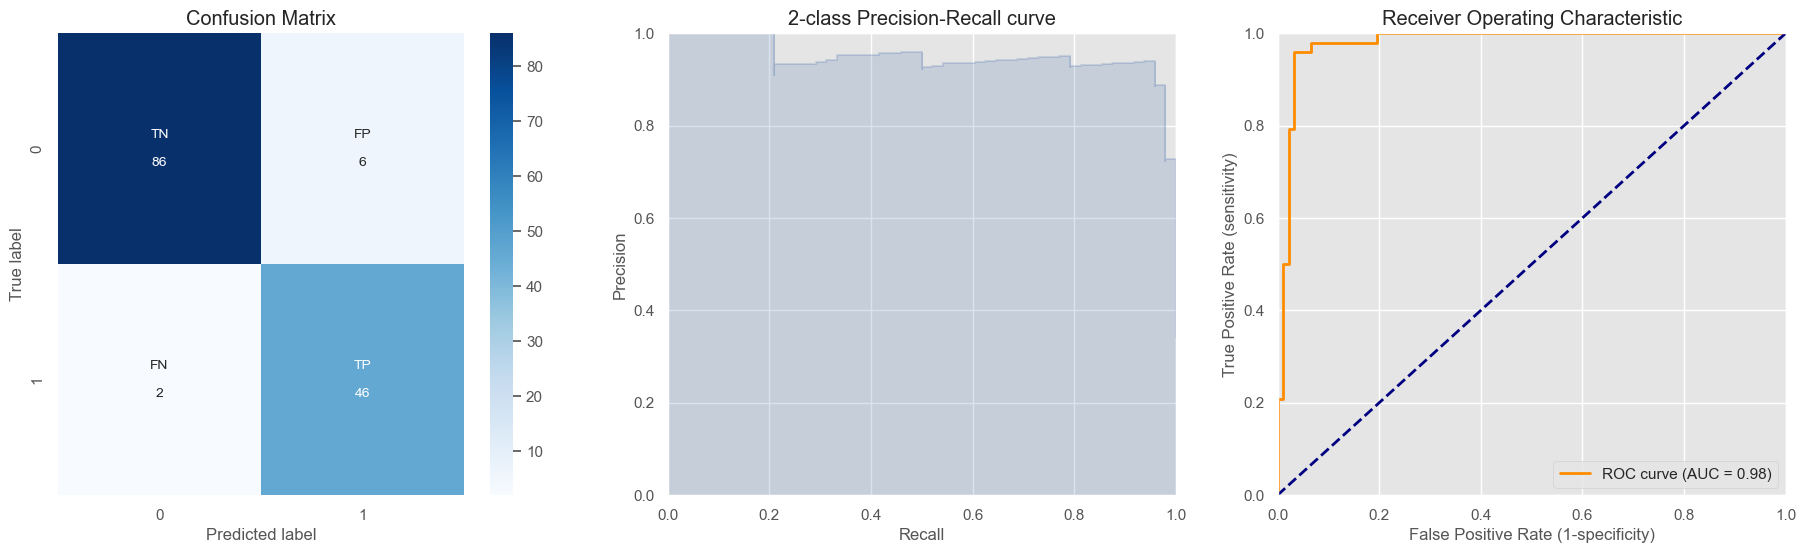


Naïve Bayes_test

Summary Report
Accuracy:  0.96 [TP / N] Proportion of predicted labels that match true labels
Precision: 0.92 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative
Recall:    0.96 [TP / (TP + FN)] Ability of the classifier to find all positive samples
F1-score:  0.94 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall
ROC AUC:   0.96
-----------------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
----------------------------------------------------------------------------------------------------------------- 



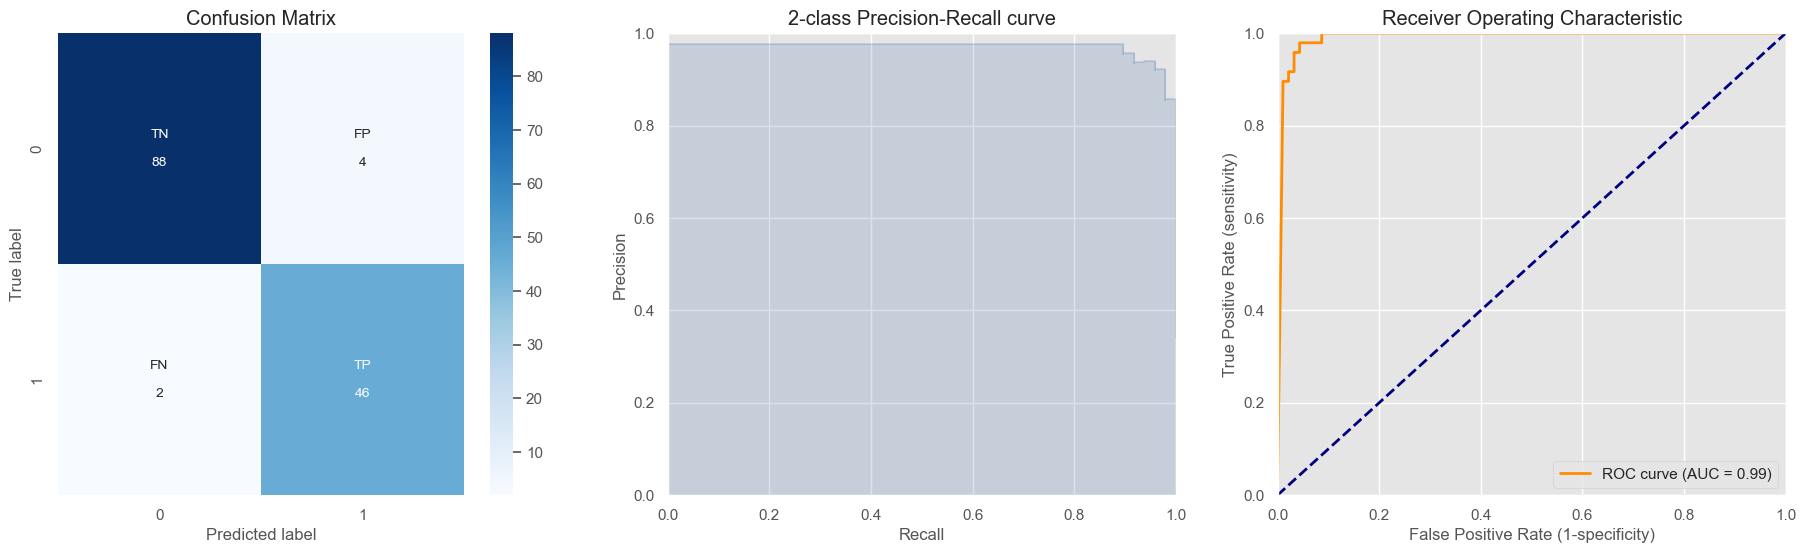


Logistic Regression_test

Summary Report
Accuracy:  0.94 [TP / N] Proportion of predicted labels that match true labels
Precision: 0.93 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative
Recall:    0.88 [TP / (TP + FN)] Ability of the classifier to find all positive samples
F1-score:  0.90 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall
ROC AUC:   0.92
-----------------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
----------------------------------------------------------------------------------------------------------------- 



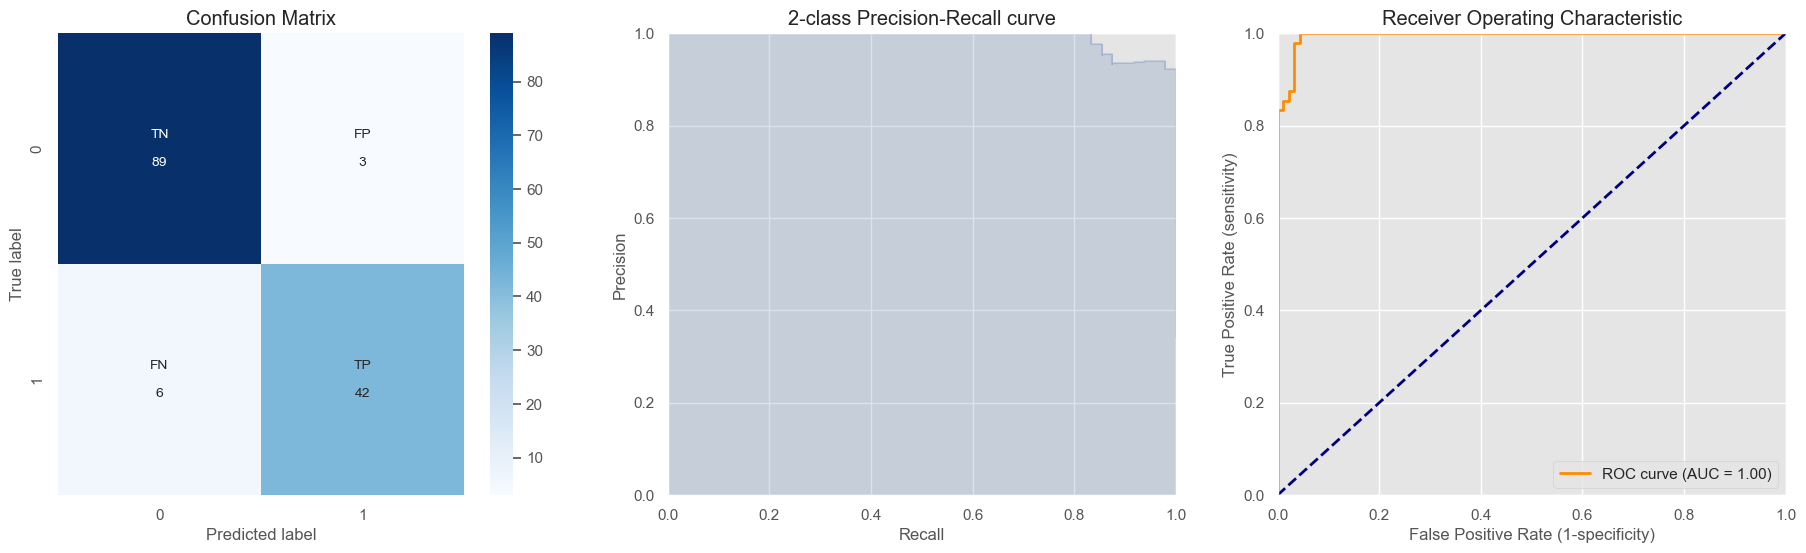


Stacking_test

Summary Report
Accuracy:  0.95 [TP / N] Proportion of predicted labels that match true labels
Precision: 0.92 [TP / (TP + FP)] Ability of the classifier not to label as positive a sample that is negative
Recall:    0.94 [TP / (TP + FN)] Ability of the classifier to find all positive samples
F1-score:  0.93 [F1 = 2 * (precision * recall) / (precision + recall)] Harmonic mean of the precision and recall
ROC AUC:   0.95
-----------------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples
----------------------------------------------------------------------------------------------------------------- 



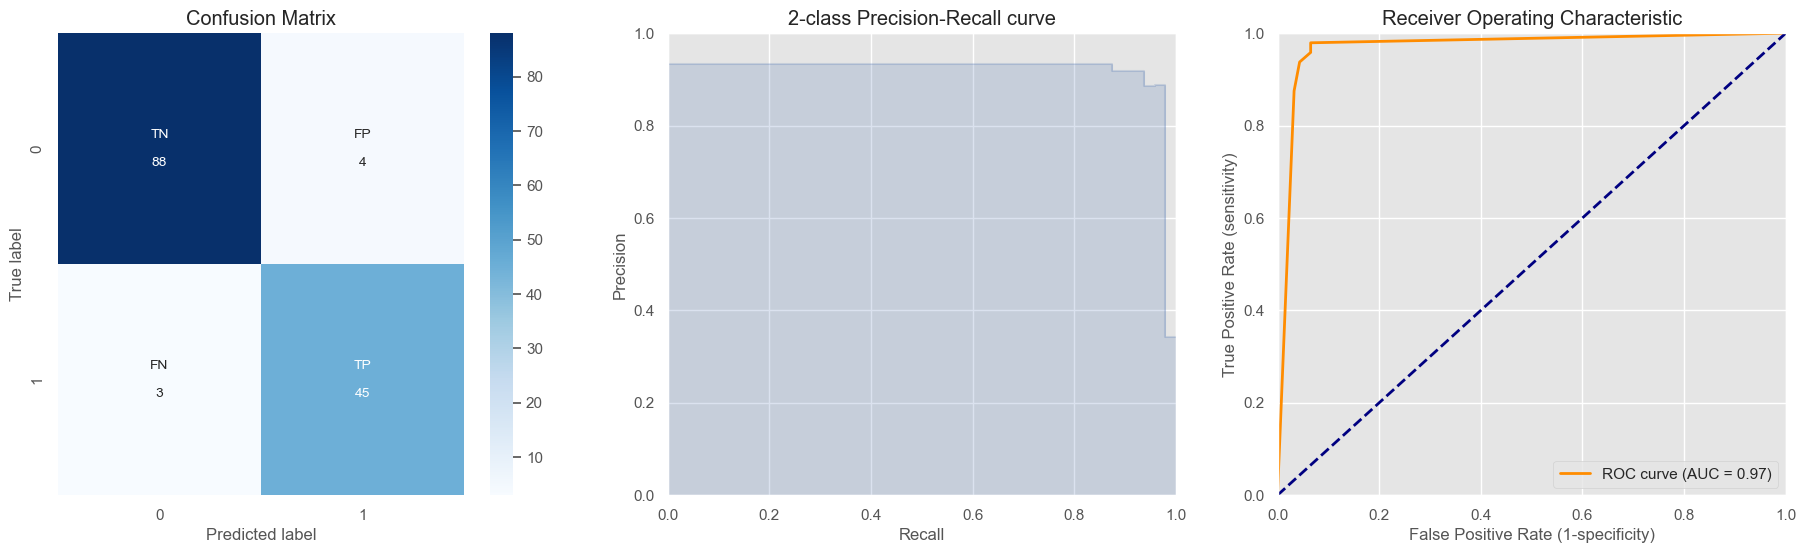

,Model,Accuracy,Precision,Recall,F1-score,ROC_AUC
0,K-NN_train,0.970,0.963,0.948,0.956,0.965
1,Random Forest_train,0.968,0.919,0.995,0.955,0.974
2,Naïve Bayes_train,0.961,0.913,0.979,0.945,0.965
3,Logistic Regression_train,0.968,0.963,0.943,0.953,0.962
4,Stacking_train,0.973,0.949,0.974,0.962,0.973
5,K-NN_test,0.936,0.933,0.875,0.903,0.921
6,Random Forest_test,0.943,0.885,0.958,0.920,0.947
7,Naïve Bayes_test,0.957,0.920,0.958,0.939,0.957
8,Logistic Regression_test,0.936,0.933,0.875,0.903,0.921
9,Stacking_test,0.950,0.918,0.938,0.928,0.947


In [102]:
## Print summary report including all plots, combine performance indicators of all models and append to dataframe

results = results_train.copy()

# Model names
models = ['K-NN_test', 'Random Forest_test', 'Naïve Bayes_test', 'Logistic Regression_test', 'Stacking_test']

# Iterate through models
for i, m in enumerate([clf1, clf2, clf3, lr, sclf]):
    print(f'\n\033[1m{Fore.BLUE}{models[i]}{Style.RESET_ALL}\033[0m\n')
    
    # Summary report
    accuracy_, precision_, recall_, f1_, roc_auc_ = show_summary_report(m, Xs_test, y_test)
    
    # Round values
    list = [accuracy_, precision_, recall_, f1_, roc_auc_]
    accuracy_, precision_, recall_, f1_, roc_auc_ = [round(x, 3) for x in list]
    
    # Add results to df
    results.loc[i+len(results_train)] = {'Model': models[i], 'Accuracy': accuracy_, 'Precision': precision_,
                                         'Recall': recall_, 'F1-score': f1_, 'ROC_AUC': roc_auc_}    

# Print dataframe with performance indicators for all models
print('\n')
results

**Documentation**
* Models don't seem to overfit
* Naive Bayes seems to be the best performer

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

The model can be used to answer (predict) if a person is diagnosed with a **Benign** or **Malignant** cancer.

In [103]:
# Make prediction on testing set using Stacking model 
y_pred = sclf.predict(Xs_test)
y_pred[:5]

array([1, 0, 0, 0, 1])

In [104]:
# Note! y_test is indexed
y_test

549    1
154    0
297    0
96     0
493    1
      ..
191    1
575    0
350    0
346    0
437    0
Name: class, Length: 140, dtype: int32

In [105]:
# Combine predictions and actual values 
target_pred = pd.DataFrame(y_test)
target_pred["class_prediction"] = y_pred
target_pred.head()

,class,class_prediction
549,1,1
154,0,0
297,0,0
96,0,0
493,1,1


In [106]:
# Merge df 'X' with predictions/actual values
prediction_df = pd.merge(X, target_pred, how = 'left', left_index = True, right_index = True)
prediction_df.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,class_prediction
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,NaN,NaN
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,NaN,NaN
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,NaN,NaN
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,NaN,NaN


In [107]:
# Inspect instance 549
prediction_df.iloc[549]

clump_thickness                7.0
uniformity_of_cell_size        8.0
uniformity_of_cell_shape       3.0
marginal_adhesion              7.0
single_epithelial_cell_size    4.0
bare_nuclei                    5.0
bland_chromatin                7.0
normal_nucleoli                8.0
mitoses                        2.0
class                          1.0
class_prediction               1.0
Name: 549, dtype: float64



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



